In [4]:
! ls ../dxodnd/gdrive

tomato		Tomato_D05	Tomato_D08.zip	Tomato_P03
Tomato_D01	Tomato_D05.zip	Tomato_D09	Tomato_P03.zip
Tomato_D01.zip	Tomato_D07	Tomato_D09.zip	Tomato_P05
Tomato_D04	Tomato_D07.zip	Tomato_H	Tomato_P05.zip
Tomato_D04.zip	Tomato_D08	Tomato_H.zip	tomato_resized.zip


In [2]:
! wget https://dl.google.com/go/go1.13.4.linux-amd64.tar.gz

--2019-11-12 15:14:47--  https://dl.google.com/go/go1.13.4.linux-amd64.tar.gz
Resolving dl.google.com (dl.google.com)... 74.125.195.93, 74.125.195.91, 74.125.195.190, ...
Connecting to dl.google.com (dl.google.com)|74.125.195.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120054682 (114M) [application/octet-stream]
Saving to: ‘go1.13.4.linux-amd64.tar.gz’

go1.13.4.linux-amd6 100%[===================>] 114.49M   172MB/s    in 0.7s    

2019-11-12 15:14:48 (172 MB/s) - ‘go1.13.4.linux-amd64.tar.gz’ saved [120054682/120054682]



In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [2]:
import zipfile
 
try:
    with zipfile.ZipFile("data.zip") as zf:
        zf.extractall()
        print("uncompress success")
 
except:
    print("uncompress fail")



uncompress fail


In [2]:
# H 정상, D01 궤양병, D04 잎곰팡이병, D05 점무늬병, D07 토마토퇴록바이러스
# D08 황화잎말림바이러스, D09 흰가루병
# P03 아메리카잎굴파리, P05 청벌레
# Tomato_?? 형식

def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'Tomato_H':
            label = 0
        elif labels == 'Tomato_D01':
            label = 1
        elif labels == 'Tomato_D04':
            label = 2
        elif labels == 'Tomato_D05':
            label = 3
        elif labels == 'Tomato_D08':
            label = 4
        elif labels == 'Tomato_P03':
            label = 5
            
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image, (224, 224))
            Images.append(image)
            Labels.append(label)
#     return shuffle(Images,Labels,random_state=817328462)
    return Images,Labels
def get_classlabel(class_code):
    labels = {0: 'Tomato_H', 1: 'Tomato_D01', 2: 'Tomato_D04', 3: 'Tomato_D05',
              4: 'Tomato_D08', 5: 'Tomato_P03'}
    return labels[class_code]

In [3]:
Images, Labels = get_images('./dataset/tomato_1/') #Extract the training images from the folders.

In [4]:
Images_np = np.array(Images)

Labels_np = np.array(Labels)
Labels_np.shape,Images_np.shape

((16785,), (16785, 224, 224, 3))

In [14]:
from sklearn.utils import shuffle

shuffle_Images, shuffle_Labels = shuffle(Images_np, Labels_np, random_state = 1)

In [15]:
idx_list = []
value_list = []
for idx, value in enumerate(shuffle_Labels):
    if value_list.count(value) < 120:
        idx_list.append(idx)
        value_list.append(value)
        
new_Labels = shuffle_Labels[[idx_list]]
new_Images = shuffle_Images[[value_list]]        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


In [16]:
np.bincount(new_Labels), new_Images.shape

(array([120, 120, 120, 120, 120, 120]), (720, 128, 128, 3))

In [9]:
new_Labels

array([0, 5, 5, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 3, 5, 5, 0, 3, 0, 0, 2, 0,
       2, 0, 5, 0, 0, 6, 5, 0, 5, 2, 5, 0, 3, 0, 5, 5, 0, 6, 5, 0, 5, 0,
       5, 5, 0, 2, 2, 2, 3, 0, 2, 0, 0, 0, 3, 0, 5, 0, 6, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 3, 2, 5, 3, 0, 0, 5, 5, 0, 0, 3, 0, 5, 3, 0,
       5, 2, 2, 0, 3, 1, 5, 4, 0, 0, 3, 5, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3,
       5, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 5, 5, 0, 3, 0, 0, 3, 0, 0, 0, 5,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 2, 5, 5, 0, 5, 0, 0, 0,
       3, 0, 0, 3, 5, 0, 0, 3, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 0, 3, 0,
       5, 3, 4, 0, 4, 5, 5, 2, 0, 0, 3, 3, 0, 5, 0, 3, 0, 0, 5, 3, 5, 0,
       3, 0, 0, 0, 0, 4, 5, 0, 5, 5, 0, 5, 0, 0, 5, 0, 3, 0, 0, 0, 0, 4,
       4, 1, 3, 5, 5, 5, 5, 5, 3, 5, 2, 3, 3, 5, 4, 5, 3, 3, 5, 5, 5, 2,
       2, 5, 2, 4, 3, 3, 3, 5, 3, 2, 2, 4, 5, 3, 3, 5, 3, 5, 1, 3, 3, 5,
       3, 5, 2, 4, 5, 5, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 3, 5, 5, 2, 3, 5,
       5, 4, 5, 5, 5, 3, 3, 5, 3, 5, 5, 5, 2, 5, 4,

In [17]:
np.save('./dataset/Label_120.npy', new_Labels)
np.save('./dataset/Image_120.npy', new_Images)

In [5]:
np.save('./dataset/Image_244.npy', Images_np)
np.save('./dataset/Label_244.npy', Labels_np)

In [16]:
Images = np.load('./dataset/Image_1.npy') #converting the list of images to numpy array.
Labels = np.load('./dataset/Label_1.npy')

In [15]:
Labels_np

array([0, 0, 0, ..., 8, 8, 8])

In [17]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (17063, 128, 128, 3)
Shape of Labels: (17063,)


In [ ]:
len(Images)

In [25]:
# np.save('Images', Images)

In [27]:
# np.save('Labels', Labels)

In [18]:
# 위까지 데이터를 다 정제시켰습니다. 이제 섞고 10%만 가져와보겠습니다.
# 똑같이 섞이는지 확인하기 위해 테스트
a = [1, 2, 3, 4, 5, 6, 7]
b = [1, 2, 3, 4, 5, 6, 7]
c, d = shuffle(a, b, random_state = 1)
c, d

([7, 3, 2, 1, 5, 4, 6], [7, 3, 2, 1, 5, 4, 6])

In [19]:
# 되네요 이제 섞어보겠습니다.
shuffle_Images, shuffle_Labels = shuffle(Images, Labels, random_state = 1)

In [20]:
# 원본 데이터의 데이터 비율들을 한 번 보겠습니다.
names = {0: 'Tomato_H', 1: 'Tomato_D01', 2: 'Tomato_D04', 3: 'Tomato_D05', 
             4: 'Tomato_D07', 5: 'Tomato_D08', 6: 'Tomato_D09', 7: 'Tomato_P03', 
             8: 'Tomato_P05'}

for i in range(9):
    print('{}의 전체 대비 개수: {}, 비율: {:0.2f}'\
          .format(names[i], sum(Labels == i), (sum(Labels == i)/len(Labels) * 100)))

Tomato_H의 전체 대비 개수: 9955, 비율: 58.34
Tomato_D01의 전체 대비 개수: 229, 비율: 1.34
Tomato_D04의 전체 대비 개수: 766, 비율: 4.49
Tomato_D05의 전체 대비 개수: 2061, 비율: 12.08
Tomato_D07의 전체 대비 개수: 90, 비율: 0.53
Tomato_D08의 전체 대비 개수: 426, 비율: 2.50
Tomato_D09의 전체 대비 개수: 49, 비율: 0.29
Tomato_P03의 전체 대비 개수: 3348, 비율: 19.62
Tomato_P05의 전체 대비 개수: 139, 비율: 0.81


In [21]:
# 전체 다 가보겠습니다.
shuffle_Images_10per, shuffle_Labels_10per = shuffle_Images[:1700].copy(), \
                                            shuffle_Labels[:1700].copy()

In [22]:
for i in range(9):
    print('{}의 전체 대비 개수: {}, 비율: {:0.2f}'\
          .format(names[i], sum(shuffle_Labels_all == i),\
                  (sum(shuffle_Labels_all == i)/len(shuffle_Labels_all) * 100)))


NameError: name 'shuffle_Labels_all' is not defined

In [58]:
len(Images)

17063

In [65]:
for i in range(9):
    print('{}의 전체 대비 개수: {}, 비율: {:0.2f}'\
          .format(names[i], sum(shuffle_Labels_10per == i), (sum(shuffle_Labels_10per == i)\
                                               /len(shuffle_Labels_10per) * 100)))

Tomato_H의 전체 대비 개수: 1009, 비율: 59.35
Tomato_D01의 전체 대비 개수: 15, 비율: 0.88
Tomato_D04의 전체 대비 개수: 70, 비율: 4.12
Tomato_D05의 전체 대비 개수: 199, 비율: 11.71
Tomato_D07의 전체 대비 개수: 15, 비율: 0.88
Tomato_D08의 전체 대비 개수: 36, 비율: 2.12
Tomato_D09의 전체 대비 개수: 3, 비율: 0.18
Tomato_P03의 전체 대비 개수: 337, 비율: 19.82
Tomato_P05의 전체 대비 개수: 16, 비율: 0.94


In [ ]:
# 이 정도면 원본비율과 비슷하게 떼진 것 같습니다. 이 데이터로 학습을 한 번
# 해보도록 하겠습니다.

In [23]:
import tensorflow as tf
model = Models.Sequential()


model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(128,128,3),
                        kernel_regularizer = tf.keras.regularizers.l2(0.001),
                       kernel_initializer=tf.contrib.layers.variance_scaling_initializer(uniform=False)))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(Layers.Conv2D(180,kernel_size=(3,3), activation='relu',))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Dropout(rate=0.25))
model.add(Layers.Conv2D(180,kernel_size=(3,3 ), activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3), activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3), activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3), activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Dropout(rate=0.25))
model.add(Layers.Flatten())

model.add(Layers.Dense(180, activation='relu'))
model.add(Layers.Dense(100, activation='relu'))
model.add(Layers.Dense(50, activation='relu'))
model.add(Layers.Dropout(rate=0.3))

model.add(Layers.Dense(9,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

#Utils.plot_model(model,to_file='model.png',show_shapes=True)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 200)     5600      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 200)     800       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 180)     324180    
_________________________________________________________________
max_poo

In [113]:
for i in range(9):
    print('{}의 전체 대비 개수: {}, 비율: {:0.2f}'\
          .format(names[i], sum(shuffle_Labels_10per == i), (sum(shuffle_Labels_10per == i)\
                                               /len(shuffle_Labels_10per) * 100)))

Tomato_H의 전체 대비 개수: 1009, 비율: 59.35
Tomato_D01의 전체 대비 개수: 15, 비율: 0.88
Tomato_D04의 전체 대비 개수: 70, 비율: 4.12
Tomato_D05의 전체 대비 개수: 199, 비율: 11.71
Tomato_D07의 전체 대비 개수: 15, 비율: 0.88
Tomato_D08의 전체 대비 개수: 36, 비율: 2.12
Tomato_D09의 전체 대비 개수: 3, 비율: 0.18
Tomato_P03의 전체 대비 개수: 337, 비율: 19.82
Tomato_P05의 전체 대비 개수: 16, 비율: 0.94


In [24]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(shuffle_Labels_10per),
                                                 shuffle_Labels_10per)
class_weights

array([ 0.1963502 ,  8.99470899,  2.36111111,  0.97869891, 18.88888889,
        4.72222222, 26.98412698,  0.50913447, 11.80555556])

In [25]:
class_weight = {}

for i in range(9):
    class_weight[i] = class_weights[i]
    
class_weight

{0: 0.19635019635019635,
 1: 8.994708994708995,
 2: 2.361111111111111,
 3: 0.9786989061600461,
 4: 18.88888888888889,
 5: 4.722222222222222,
 6: 26.984126984126984,
 7: 0.5091344713986223,
 8: 11.805555555555555}

In [26]:
class_weight = [np.sqrt(np.sqrt(i)) for i in class_weights]
class_weight

[0.6656682374721262,
 1.7317961878181445,
 1.2395929746824754,
 0.9946316523082205,
 2.084738577568364,
 1.4741327851997876,
 2.279171958517654,
 0.8447109531048835,
 1.8536238439018267]

In [27]:
trained = model.fit(shuffle_Images_10per, shuffle_Labels_10per, epochs=50, validation_split=0.2, \
                   class_weight = class_weight)

Train on 1360 samples, validate on 340 samples
Epoch 1/50
1360/1360 [==============================] - 30s 22ms/sample - loss: 1.9356 - acc: 0.5176 - val_loss: 2.4366 - val_acc: 0.5794
Epoch 2/50
  96/1360 [=>............................] - ETA: 18s - loss: 1.8340 - acc: 0.5312

KeyboardInterrupt: 

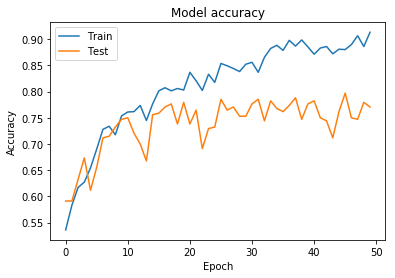

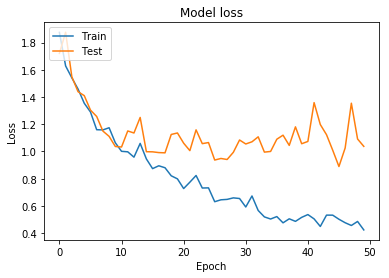

In [182]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [28]:
# 분류나 한 번 해봅시다.
test_images, test_labels = shuffle_Images[1700:2000].copy(), shuffle_Labels[1700:2000].copy()

In [183]:
# test_images,test_labels = get_images('./test/')
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

300/300 [==============================] - 1s 4ms/sample - loss: 1.3978 - acc: 0.7500


[1.3977762937545777, 0.75]

In [45]:
len(test_images)

18

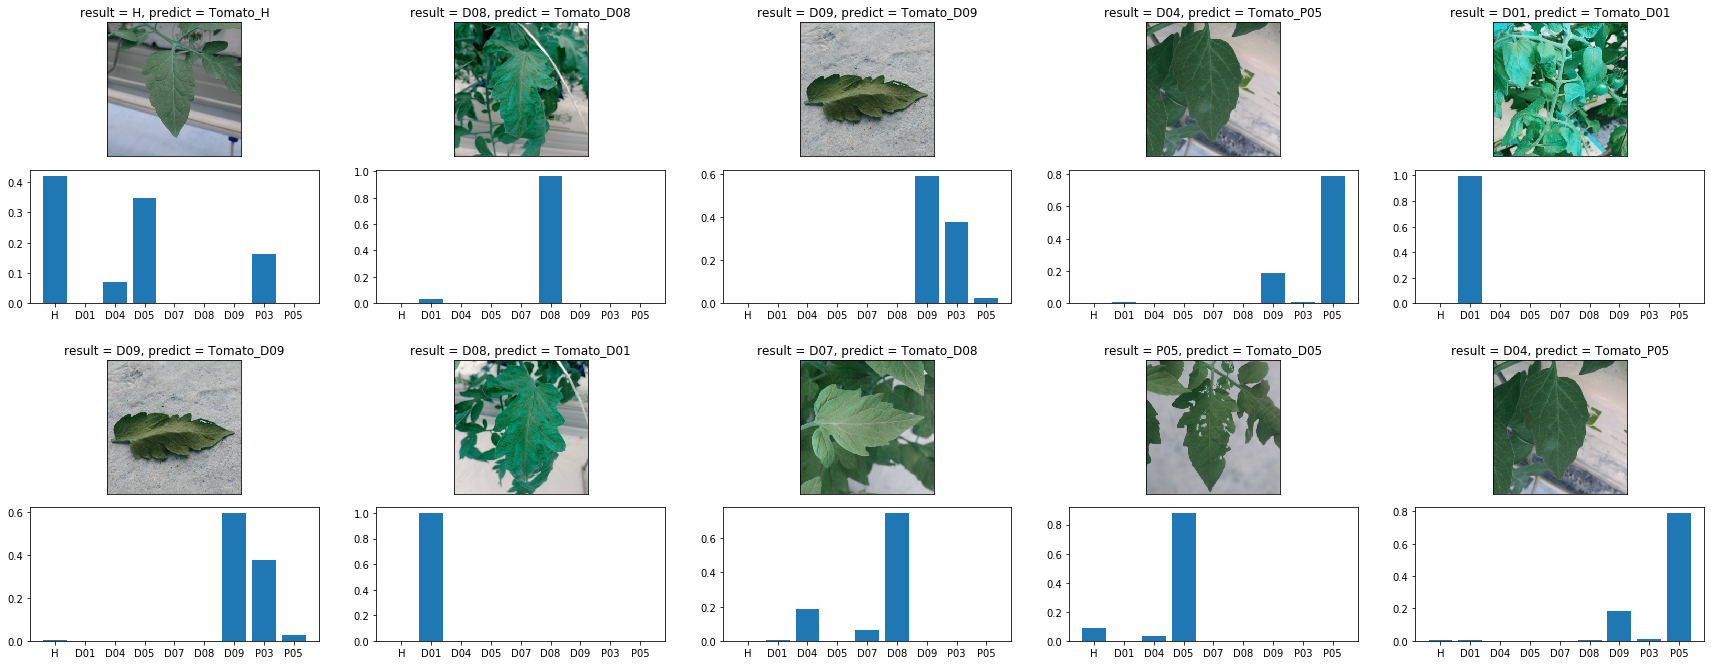

In [50]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(10):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(test_images)) # 0~18 중 하나를 뽑는 난수 생성
    pred_image = np.array([test_images[rnd_number]]) # test_images[random] 하나 뽑아서 넘파이로 변경\
    result = ['H', 'D01', 'D04', 'D05', 'D07', 'D08', 'D09', 'P03', 'P05'][test_labels[rnd_number]]
    pred_class = get_classlabel(model.predict_classes(pred_image)[0]) # 추측해서 가장 높은 값이 나온 거 위치 반환
    pred_prob = model.predict(pred_image).reshape(9)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title('result = {}, predict = {}'.format(result, pred_class))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar(['H', 'D01', 'D04', 'D05', 'D07', 'D08', 'D09', 'P03', 'P05'],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [29]:
# 섞고 난 뒤 1700개를 뗀 데이터의 비율을 보겠습니다.
shuffle_Images_90per, shuffle_Labels_90per = shuffle_Images[:16063].copy(), \
                                            shuffle_Labels[:16063].copy()

In [30]:
# 원본 비율

# 원본 데이터의 데이터 비율들을 한 번 보겠습니다.
names = {0: 'Tomato_H', 1: 'Tomato_D01', 2: 'Tomato_D04', 3: 'Tomato_D05', 
             4: 'Tomato_D07', 5: 'Tomato_D08', 6: 'Tomato_D09', 7: 'Tomato_P03', 
             8: 'Tomato_P05'}

for i in range(9):
    print('{}의 전체 대비 개수: {}, 비율: {:0.2f}'\
          .format(names[i], sum(Labels == i), (sum(Labels == i)/len(Labels) * 100)))

Tomato_H의 전체 대비 개수: 9955, 비율: 58.34
Tomato_D01의 전체 대비 개수: 229, 비율: 1.34
Tomato_D04의 전체 대비 개수: 766, 비율: 4.49
Tomato_D05의 전체 대비 개수: 2061, 비율: 12.08
Tomato_D07의 전체 대비 개수: 90, 비율: 0.53
Tomato_D08의 전체 대비 개수: 426, 비율: 2.50
Tomato_D09의 전체 대비 개수: 49, 비율: 0.29
Tomato_P03의 전체 대비 개수: 3348, 비율: 19.62
Tomato_P05의 전체 대비 개수: 139, 비율: 0.81


In [19]:
for i in range(9):
    print('{}의 전체 대비 개수: {}, 비율: {:0.2f}'\
          .format(names[i], sum(shuffle_Labels_90per == i), (sum(shuffle_Labels_90per == i)\
                                               /len(shuffle_Labels_90per) * 100)))

Tomato_H의 전체 대비 개수: 9368, 비율: 58.32
Tomato_D01의 전체 대비 개수: 210, 비율: 1.31
Tomato_D04의 전체 대비 개수: 717, 비율: 4.46
Tomato_D05의 전체 대비 개수: 1949, 비율: 12.13
Tomato_D07의 전체 대비 개수: 89, 비율: 0.55
Tomato_D08의 전체 대비 개수: 406, 비율: 2.53
Tomato_D09의 전체 대비 개수: 46, 비율: 0.29
Tomato_P03의 전체 대비 개수: 3150, 비율: 19.61
Tomato_P05의 전체 대비 개수: 128, 비율: 0.80


In [31]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(shuffle_Labels_90per),
                                                 shuffle_Labels_90per)
class_weights = [np.sqrt(np.sqrt(i)) for i in class_weights]

In [32]:
class_weight = {}

for i in range(9):
    class_weight[i] = class_weights[i]
    
class_weight

{0: 0.6602822756639639,
 1: 1.6974086949029012,
 2: 1.2565153021443605,
 3: 0.9801260227444343,
 4: 2.1343784368053904,
 5: 1.4552086563011386,
 6: 2.4957816056261906,
 7: 0.8675977139896996,
 8: 1.932384499078597}

In [33]:
trained = model.fit(shuffle_Images_90per, shuffle_Labels_90per, epochs=60, validation_split=0.2, \
                   class_weight = class_weight)

Train on 12850 samples, validate on 3213 samples
Epoch 1/60
12850/12850 [==============================] - 205s 16ms/sample - loss: 1.4440 - acc: 0.6480 - val_loss: 1.2582 - val_acc: 0.6869
Epoch 2/60
12850/12850 [==============================] - 201s 16ms/sample - loss: 1.1441 - acc: 0.7325 - val_loss: 0.9753 - val_acc: 0.7747
Epoch 3/60
12850/12850 [==============================] - 201s 16ms/sample - loss: 1.0389 - acc: 0.7591 - val_loss: 0.9881 - val_acc: 0.7404
Epoch 4/60
12850/12850 [==============================] - 201s 16ms/sample - loss: 0.9507 - acc: 0.7701 - val_loss: 0.7998 - val_acc: 0.8073
Epoch 5/60
12850/12850 [==============================] - 201s 16ms/sample - loss: 0.9160 - acc: 0.7807 - val_loss: 1.9996 - val_acc: 0.4631
Epoch 6/60
12850/12850 [==============================] - 201s 16ms/sample - loss: 0.8695 - acc: 0.7833 - val_loss: 0.9126 - val_acc: 0.7532
Epoch 7/60
12850/12850 [==============================] - 201s 16ms/sample - loss: 0.8309 - acc: 0.7938 -

KeyboardInterrupt: 

In [34]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

NameError: name 'trained' is not defined

In [27]:
test_images, test_labels = shuffle_Images[16063:].copy(),\
shuffle_Labels[16063:].copy()

In [28]:
# test_images,test_labels = get_images('./test/')
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

1000/1000 [==============================] - 3s 3ms/sample - loss: 0.2872 - acc: 0.9220


[0.2872122461795807, 0.922]

In [31]:
model.save('90per_2root.h5')